### CIRCOS PLOT

In [1]:
# Load libraries
import pycircos
import matplotlib.pyplot as plt
from pycircos.pycircos import Gcircle, Garc
from Bio import SeqIO
import pandas as pd
import numpy as np

In the plot, the outer layer represents a feature for the positive and negative strand, in this case, the CDS. In theory, the width of the bars represent the length of the CDS, but in the picture is not clearly visible. 
The TSSs input file should contain information about the position, the direction of the gene it belongs to and the depth. 

c:\Users\tarca\OneDrive\Documentos\Internship_Josemari\TSS\circosplot\code\Lib\site-packages\Bio\SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(
c:\Users\tarca\OneDrive\Documentos\Internship_Josemari\TSS\circosplot\code\Lib\site-packages\Bio\SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(


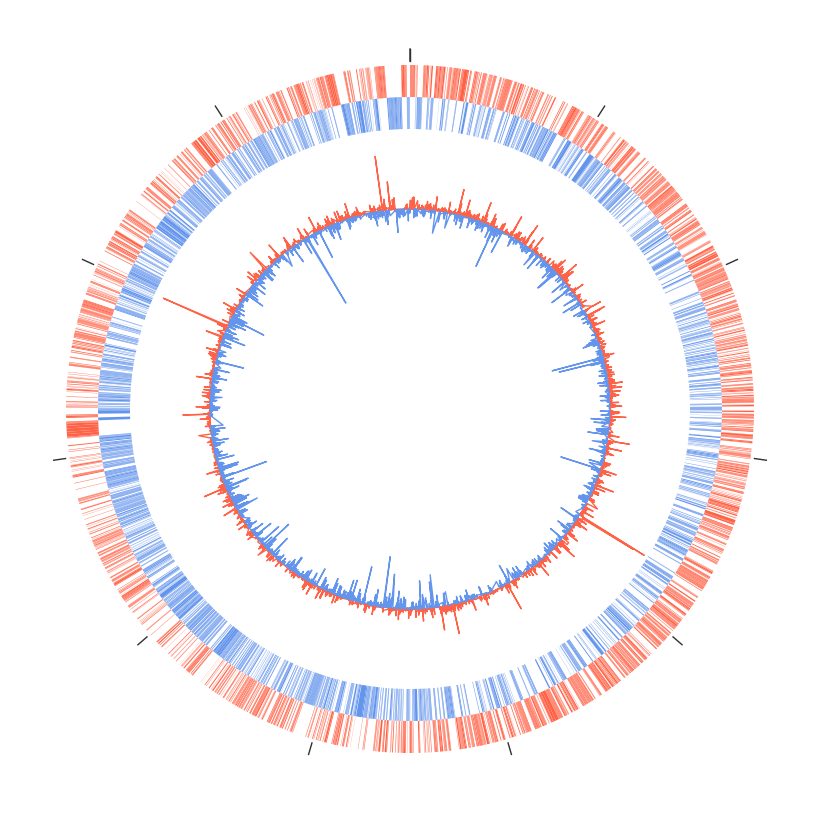

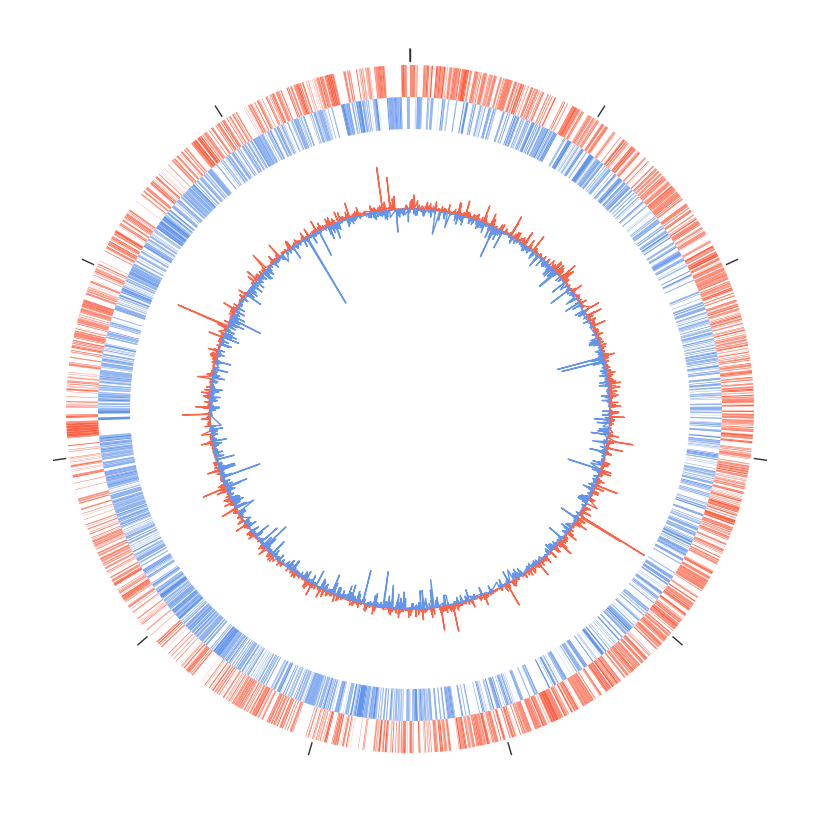

In [2]:
# Load the data
record = SeqIO.read("data/Mbovis_seq.gb", format="genbank")
TSS_KO = pd.read_excel("C:/Users/tarca/OneDrive/Documentos/Internship_Josemari/TSS/Data_outputs/TSS_data_final/final_TSS_KO.xlsx")
TSS_WT = pd.read_excel("C:/Users/tarca/OneDrive/Documentos/Internship_Josemari/TSS/Data_outputs/TSS_data_final/final_TSS_WT.xlsx")
anot_file = pd.read_excel("anot_file.xlsx")


def make_gcircle(record, data, TU_type):
    # CODE START
    gcircle = Gcircle()
    garc = Garc(arc_id="LT708304.1", record=record, interspace=0, linewidth=0,
                facecolor="#FFFFFF00", raxis_range=(0,10), label_visible=False)
    gcircle.add_garc(garc)
    gcircle.set_garcs(start=0, end=360)  # Specify the piece of the circos plot being showed

    # Add the kilobase ARC
    gcircle.add_garc(Garc(arc_id="kb_scale", record=record, interspace=0, linewidth=2, facecolor="#FFFFFF00", raxis_range=(700, 750), label_visible=True))

    # print(garc.record.features[1])
    plus_CDS  = [] 
    minus_CDS = [] 

    # print(garc.record.features.strand)
    for feat in garc.record.features:
        if feat.type == "CDS":
            if feat.strand == 1:
                plus_CDS.append(feat)
            elif feat.strand == -1:
                minus_CDS.append(feat)
        
        # print(feat)
        # print(feat.strand)
        # print(type(feat.location.start))
        # print(feat.location.end)
        # print("---------------------------next-----------------------------------")
        
        
    gcircle.featureplot(garc_id="LT708304.1", source=plus_CDS, raxis_range=(780,860), facecolor="tomato" )  # raxis_range -> where the arc will be placed (see the values are set to prevent overlapping) 
    gcircle.featureplot(garc_id="LT708304.1", source=minus_CDS, raxis_range=(700,780), facecolor="cornflowerblue") 

    # Addition of the TSSs

    tss_positions_KO = data['TSS_position']  # Column with TSS positions
    tss_depths_KO = np.sqrt(data['TSS_depth'])  # Column with TSS depths (for line values) -> NORMALIZED! 
    strand_info_KO = data['Strand']  # Column with strand information (+ or -)

    # Plot TSSs as a line plot, separate by strand
    positive_TSS_positions = []
    positive_TSS_depths = []
    negative_TSS_positions = []
    negative_TSS_depths = []

    for i, position in enumerate(tss_positions_KO):
        tss_depth = tss_depths_KO[i]
        strand = strand_info_KO[i]

        # If the TSS is on the positive strand, add to positive list
        if strand == "+":
            positive_TSS_positions.append(position)
            positive_TSS_depths.append(tss_depth)
        # If the TSS is on the negative strand, add to negative list
        elif strand == "-":
            negative_TSS_positions.append(position)
            negative_TSS_depths.append(tss_depth)


    # Plot positive strand TSSs as a line
    gcircle.lineplot(garc_id="LT708304.1", data=positive_TSS_depths, positions=positive_TSS_positions, raxis_range=(500, 700), linecolor="tomato", linewidth=1)

    # Plot negative strand TSSs as a line
    gcircle.lineplot(garc_id="LT708304.1", data=negative_TSS_depths, positions=negative_TSS_positions, raxis_range=(500, 300),  linecolor="cornflowerblue", linewidth=1)

    # Add the KB arc
    # Calculate step size to get approximately 11 ticks
    total_length = 4349904
    num_ticks = 11
    step = total_length // num_ticks

    # Generate tick positions
    ticks = [i for i in range(0, total_length, step)]

    # Generate labels
    labels = []
    init = 0
    for _ in range(11):
        labels.append(f"{str(init)} Mb")
        init += 0.4
        init = round(init,1)

    gcircle.tickplot(garc_id = 'LT708304.1', tickpositions=ticks, raxis_range=(870, 900), ticklabeldirection = "outer")
    gcircle.save(file_name=f"circos_{TU_type}")

gcircle_KO = make_gcircle(record, TSS_KO, "KO")
gcircle_KO = make_gcircle(record, TSS_WT, "WT")



In [3]:
downr_gene_names = ["mpt70", "MB2901","MB2902c","dipZ", "mpt83", "ufaA1", "MB0454c", "MB0456c", "MB0457c", "sigK"]

def start_end_genes(data):
    for gene in data:
        start = anot_file['start'][anot_file['gene_name'] == gene]
        end = anot_file['end'][anot_file['gene_name'] == gene]
        strand = anot_file['strand'][anot_file['gene_name'] == gene]
        if not start.empty and not end.empty:
            start_bp = start.values[0]  # Original position in base pairs
            end_bp = end.values[0]      # Original position in base pairs
            start_mb = start_bp / 1_000_000  # Convert to Mb
            end_mb = end_bp / 1_000_000      # Convert to Mb
            print(f"Gene {gene} ({strand.values[0]}) starts at {start_bp} bp ({start_mb:.2f} Mb) and ends at {end_bp} bp ({end_mb:.2f} Mb)")
        else:
            print(f"Gene {gene} not found in annotation file.")

start_end_genes(downr_gene_names)          

Gene mpt70 (+) starts at 3147958 bp (3.15 Mb) and ends at 3148539 bp (3.15 Mb)
Gene MB2901 (+) starts at 3148591 bp (3.15 Mb) and ends at 3148905 bp (3.15 Mb)
Gene MB2902c (-) starts at 3148936 bp (3.15 Mb) and ends at 3149799 bp (3.15 Mb)
Gene dipZ (+) starts at 3145775 bp (3.15 Mb) and ends at 3147862 bp (3.15 Mb)
Gene mpt83 (+) starts at 3144833 bp (3.14 Mb) and ends at 3145495 bp (3.15 Mb)
Gene ufaA1 (-) starts at 536243 bp (0.54 Mb) and ends at 537526 bp (0.54 Mb)
Gene MB0454c (-) starts at 535464 bp (0.54 Mb) and ends at 536234 bp (0.54 Mb)
Gene MB0456c (-) starts at 537523 bp (0.54 Mb) and ends at 538188 bp (0.54 Mb)
Gene MB0457c (-) starts at 538248 bp (0.54 Mb) and ends at 539567 bp (0.54 Mb)
Gene sigK (-) starts at 534852 bp (0.53 Mb) and ends at 535415 bp (0.54 Mb)


In [4]:
upr_gene_names = ["MB1762c", "MB1767", "MB1768c", "MB2019", "ctpF", "MB2021c", "MB2028c", "fdxA", "hspX", "acg", "hrp1", "MB2660c", "MB2661", "MB3149c", "MB3150", "MB3152c", "tgs1", "MB3155"]
start_end_genes(upr_gene_names)          

Gene MB1762c (-) starts at 1949661 bp (1.95 Mb) and ends at 1950293 bp (1.95 Mb)
Gene MB1767 (+) starts at 1955463 bp (1.96 Mb) and ends at 1955747 bp (1.96 Mb)
Gene MB1768c (-) starts at 1955761 bp (1.96 Mb) and ends at 1957443 bp (1.96 Mb)
Gene MB2019 (+) starts at 2222330 bp (2.22 Mb) and ends at 2223283 bp (2.22 Mb)
Gene ctpF (+) starts at 2223485 bp (2.22 Mb) and ends at 2226202 bp (2.23 Mb)
Gene MB2021c (-) starts at 2226271 bp (2.23 Mb) and ends at 2227047 bp (2.23 Mb)
Gene MB2028c (-) starts at 2234322 bp (2.23 Mb) and ends at 2235209 bp (2.24 Mb)
Gene fdxA (-) starts at 2239410 bp (2.24 Mb) and ends at 2239754 bp (2.24 Mb)
Gene hspX (-) starts at 2266822 bp (2.27 Mb) and ends at 2267256 bp (2.27 Mb)
Gene acg (+) starts at 2267453 bp (2.27 Mb) and ends at 2268448 bp (2.27 Mb)
Gene hrp1 (-) starts at 2924436 bp (2.92 Mb) and ends at 2924867 bp (2.92 Mb)
Gene MB2660c (-) starts at 2925381 bp (2.93 Mb) and ends at 2926622 bp (2.93 Mb)
Gene MB2661 (+) starts at 2926932 bp (2.93 Mb)